This code is adapted from: http://blog.thehumangeo.com/2014/05/12/drawing-boundaries-in-python/ and https://github.com/dwyerk/boundaries/tree/master/data

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
from shapely.geometry import Point
from descartes import PolygonPatch
from modules.concave_hull import alpha_shape

In [3]:
### Lightning Data
filename = '/home/sbarc/students/nash/data/ENTLN/ENTLN_flashes_-_UC_Santa_Barbara_030419_00UTC_to_030819_00UTC_flash_combined.csv'
df = pd.read_csv(filename, header=0, parse_dates=['timestamp'])
df['day'] = df.timestamp.dt.day ## Make a column that shows just the day of the lightning strike
df['hour'] = df.timestamp.dt.hour ## Make a column that shows just the day of the lightning strike
df['freq'] = df.icmultiplicity + df.cgmultiplicity

points_lat = []
points_lon = []
df_6hour = []
days_less = ['05', '05', '05', '05', '06', '06', '06', '06', '07']
days_greater = ['04', '05', '05', '05', '05', '06', '06', '06', '06']
hours_less = ['00', '06', '12', '18', '00', '06', '12', '18', '00']
hours_greater = ['18', '00', '06', '12', '18', '00','06', '12', '18']
for i in np.arange(9):
    mask = (df['timestamp'] < '2019-03-{0}-{1}'.format(days_less[i], hours_less[i])) & (df['timestamp'] >= '2019-03-{0}-{1}'.format(days_greater[i], hours_greater[i]))
    df_6hour.append(df[mask])
    points_lat.append(df.latitude[mask])            
    points_lon.append(df.longitude[mask])
    
x, y = points_lon[1], points_lat[1]
points = list(zip(x, y))
new_points = [Point(point) for point in points] ## Shapely Point Object

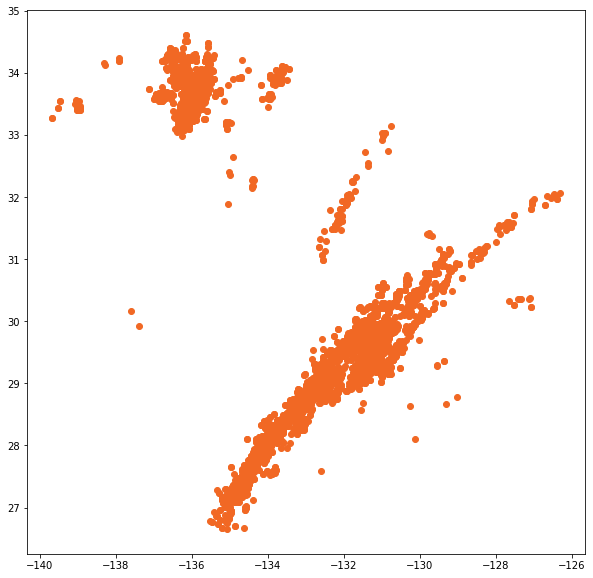

In [4]:
pl.figure(figsize=(10,10))
_ = pl.plot(x,y,'o', color='#f16824')

In [7]:
def plot_polygon(polygon):
    fig = pl.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    margin = .3

    x_min, y_min, x_max, y_max = polygon.bounds

    ax.set_xlim([x_min-margin, x_max+margin])
    ax.set_ylim([y_min-margin, y_max+margin])
    patch = PolygonPatch(polygon, fc='#000000', ec='#ff0000', fill=False,
                         alpha=0.7, linewidth=2)
    ax.add_patch(patch)
    return fig

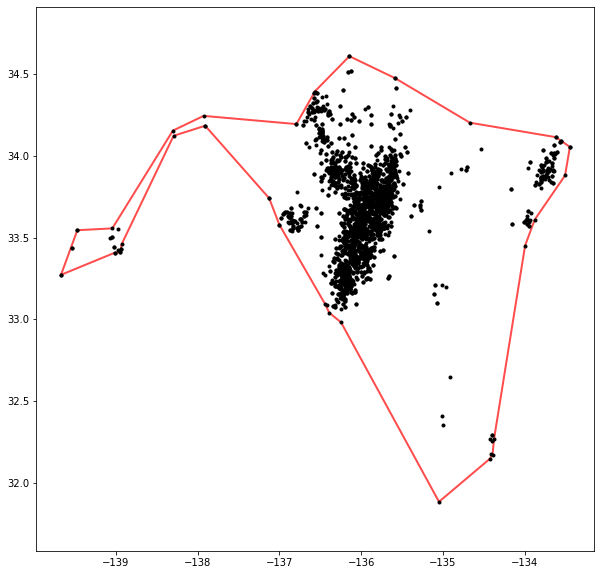

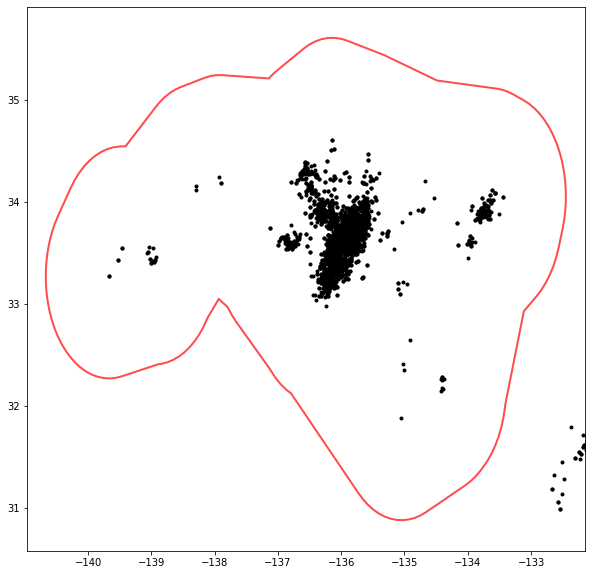

In [8]:
alpha = 1.1
concave_hull, edge_points = alpha_shape(new_points, alpha=alpha)

plot_polygon(concave_hull)
_ = pl.plot(x,y,'.', color='k')
plot_polygon(concave_hull.buffer(1))
_ = pl.plot(x,y,'.', color='k')